In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from typing import Tuple

%matplotlib ipympl

In [2]:
def univariate_linear_regression(x: np.ndarray, w: float, b: float) -> np.ndarray:
    return w * x + b


def mean_squared_error(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
        $1 / 2m * \sigma (\hat y - y) ^ 2$
    """
    return 0.5 * np.average((y_hat - y) ** 2)


def mean_squared_error_derivative(y: np.ndarray, y_hat: np.ndarray, x: np.ndarray) -> float:
    return np.average((y_hat - y) * x)


def gradient_step(y, y_hat, x, learning_rate) -> Tuple[float, float]:
    w_prime = mean_squared_error_derivative(y, y_hat, x)
    b_prime = mean_squared_error_derivative(y, y_hat, np.ones_like(x))

    return (learning_rate * w_prime, learning_rate * b_prime)


def fit_model(
        x: np.ndarray,
        y: np.ndarray,
        learning_rate: float,
        epochs: int,
        init_w: float = None,
        init_b: float = None,
        verbose: bool = False,
        eps: float = 1e-8,
    ) -> Tuple[float, float]:
    last_error = 0
    w = init_w
    b = init_b

    for epoch in range(epochs):
        y_hat = univariate_linear_regression(x, w, b)

        error = mean_squared_error(y, y_hat)

        if abs(error - last_error) < eps:
            break

        if verbose == True and epoch % 100 == 0:
            print(f'[epoch: {epoch}], error = {error}')

        w_update, b_update = gradient_step(y, y_hat, x, learning_rate)

        w -= w_update
        b -= b_update
        last_error = error
    
    return (w, b)

In [3]:
rng = np.random.default_rng(42)

In [4]:
m = 20
x = rng.uniform(1, 20, size=m)
y = rng.uniform(20, 40, size=m)

print(f'x = {x}')
print(f'y = {y}')

x = [15.70516492  9.33869036 17.31336048 14.24999255  2.78936961 19.53682468
 15.46165434 15.9352218   3.43415902  9.55733282  8.04516246 18.60853479
 13.23343728 16.63247065  9.42486978  5.31753571 11.53711095  2.21252787
 16.72499227 13.00162358]
y = [35.1617548  27.09051936 39.41396049 37.86242243 35.56766994 23.89277416
 29.33442007 20.87607532 23.08578984 33.66097906 34.89524312 39.35019465
 26.51650716 27.40919412 29.39111623 23.78942718 22.59843011 29.51409852
 24.53818698 33.39627989]


In [5]:
alpha = 0.01
epochs = 5000

w, b = rng.random(size=2)

ws, bs = [w], [b]

for i in range(epochs):
    w, b = fit_model(x, y, alpha, 1, init_w=w, init_b=b)
    ws.append(w)
    bs.append(b)

print(len(ws))
print(len(bs))

5001
5001


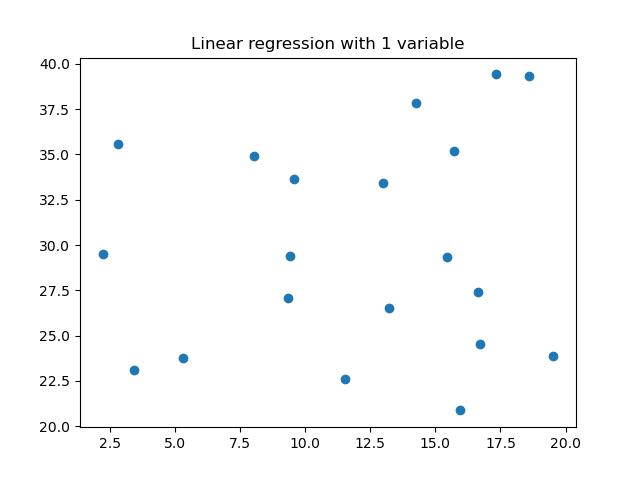

In [6]:
fig, ax = plt.subplots()

ax.set_title("Linear regression with 1 variable")
ax.scatter(x, y)

def data_gen():
    for i in itertools.count():
        yield x, univariate_linear_regression(x, ws[i], bs[i])
        

def create_line_animation():
    line, = ax.plot([], [], c='r', lw=2, label='')
    text = ax.text(0.1, 0.95, "", transform=ax.transAxes, fontsize=12)

    def animation_step(data):
        x, y_hat = data
        line.set_data(x, y_hat)
        text.set_text(f'error = {mean_squared_error(y, y_hat):.3f}')
        return line

    return animation_step


animation = FuncAnimation(fig, create_line_animation(), data_gen, interval=5, blit=True, save_count=500)

plt.show()